---
# Setup

* imports, 
* global constants (paths, time format, order of conditions)

---

In [44]:
# Imports and untilities from functions.ipynb

%run functions.ipynb

percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

---
# Load Data

* load tracking data
* convert date time
* compute durations
* compute condition-based index
---

In [45]:
data_complete = pd.read_csv(rf'{export_data}data_all.csv', sep=";")

display(data_complete)

,Date,ProbandId,Block,Trial,TrialNumber,Condition,ResultNumber,ResultLayer,ProgramState,ProgramSubState,...,Layer03,Layer04,Layer05,Layer06,Layer07,file,SubStateChange,StateChange,TrialChange,StateChangeMarker
0,2022-08-01 13:58:38.416,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,NaN,NaN,NaN,START_BLOCK | START_TRAINING
1,2022-08-01 13:58:38.448,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
2,2022-08-01 13:58:38.477,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
3,2022-08-01 13:58:38.508,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
4,2022-08-01 13:58:38.541,2,-4,0,-8,Combined Feedback,176,3,3,0,...,176,153,147,135,114,P02_2022-08-01,0.0,0.0,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371627,2022-08-23 11:30:05.409,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371628,2022-08-23 11:30:05.440,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371629,2022-08-23 11:30:05.472,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
3371630,2022-08-23 11:30:05.503,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-


In [46]:
data_experiment = pd.read_csv(rf'{export_data}data_experiment.csv', sep=";")

display(data_experiment)

,Date,ProbandId,Block,Trial,TrialNumber,Condition,ResultNumber,ResultLayer,ProgramState,ProgramSubState,...,Layer03,Layer04,Layer05,Layer06,Layer07,file,SubStateChange,StateChange,TrialChange,StateChangeMarker
0,2022-08-01 14:12:39.590,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,-2.0,1.0,-1.0,START_BLOCK | START_EXPERIMENT
1,2022-08-01 14:12:39.635,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
2,2022-08-01 14:12:39.651,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
3,2022-08-01 14:12:39.683,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
4,2022-08-01 14:12:39.696,2,0,0,0,No Feedback,166,5,4,0,...,130,139,166,150,132,P02_2022-08-01,0.0,0.0,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890534,2022-08-23 11:30:05.409,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
2890535,2022-08-23 11:30:05.440,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
2890536,2022-08-23 11:30:05.472,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-
2890537,2022-08-23 11:30:05.503,23,3,20,83,No Feedback,169,7,4,2,...,137,130,150,143,169,P23_2022-08-23,0.0,0.0,0.0,-


# Compute frametimes



In [47]:
def computeFrameTimes(data):
    frameStats = pd.DataFrame(pd.to_datetime(data["Date"]).diff().dt.microseconds / 1000.0)
    display(frameStats)

    descStats = frameStats.describe(percentiles=percentiles)

    display(descStats.apply(lambda s: s.apply('{0:.5f}'.format)))

    data["FrameStats"] = frameStats

    return frameStats, descStats

In [48]:
def createPlot(data, framestats, descstats, filename):
    outliers_threshold = 99.0

    outliers = data[data["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

    display(outliers)

    y_mean = [descstats["Date"][1]] * len(framestats)
    outliers_threshold_line = [outliers_threshold] * len(framestats)

    fig,ax = plt.subplots(figsize=(25,8))

    ax.plot(framestats.index, framestats["Date"], label='Frame Duration (ms)')
    ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
    ax.plot(framestats.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

    ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

    legend = ax.legend(loc='upper right')

    plt.yticks(np.arange(0, descstats["Date"][7], 100))


    fig.savefig(rf'{export_img}{filename}.png')
    fig.savefig(rf'{export_img}{filename}.svg')

    plt.show()

,Date
0,NaN
1,32.0
2,29.0
3,31.0
4,33.0
...,...
3371627,31.0
3371628,31.0
3371629,32.0
3371630,31.0


,Date
count,3371631.00000
mean,30.03119
std,6.62419
min,0.00000
5%,16.00000
10%,18.00000
25%,30.00000
50%,31.00000
75%,32.00000
90%,33.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3099470,22,-4,0,-8,3,0,708.0
3339288,23,2,17,59,4,1,110.0


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [descstats["Date"][1]] * len(framestats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

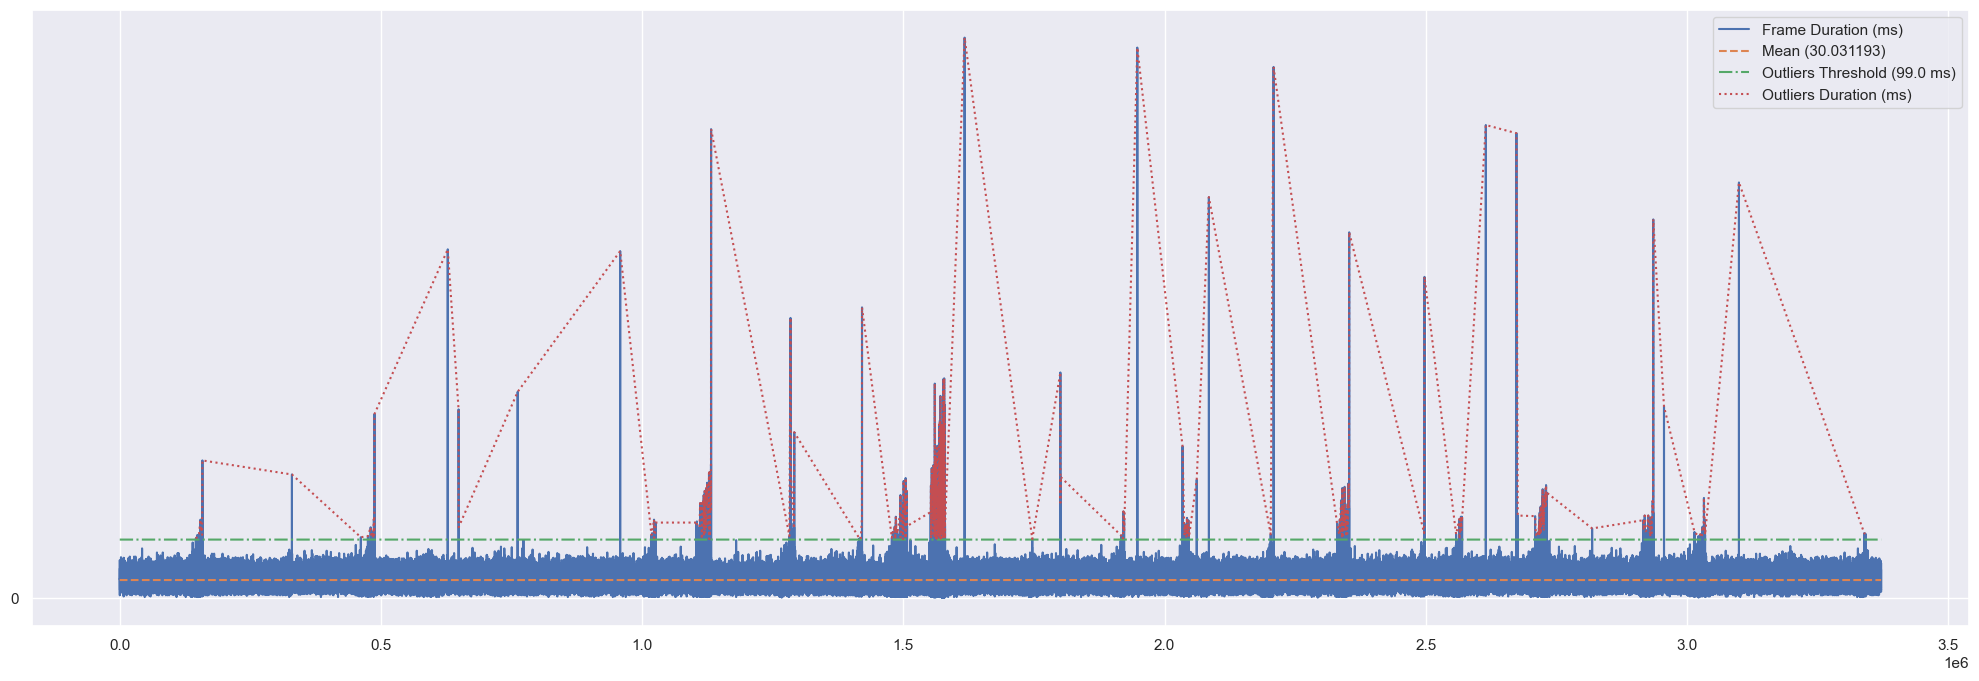

In [49]:
frameStats_complete, descStats_complete = computeFrameTimes(data_complete)

createPlot(data_complete, frameStats_complete, descStats_complete, 'frametimes_complete')

,Date
count,2.688171e+06
mean,3.003014e+01
std,6.502516e+00
min,0.000000e+00
5%,1.600000e+01
10%,1.800000e+01
25%,3.000000e+01
50%,3.100000e+01
75%,3.200000e+01
90%,3.300000e+01


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
145647,2,3,11,74,4,1,101.0
147531,2,3,12,75,4,1,103.0
148672,2,3,13,76,4,1,107.0
151813,2,3,16,79,4,1,109.0
154482,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
3034412,21,1,20,41,4,1,116.0
3034493,21,1,20,41,4,1,117.0
3034571,21,1,20,41,4,1,107.0
3339288,23,2,17,59,4,1,110.0


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [descstats["Date"][1]] * len(framestats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

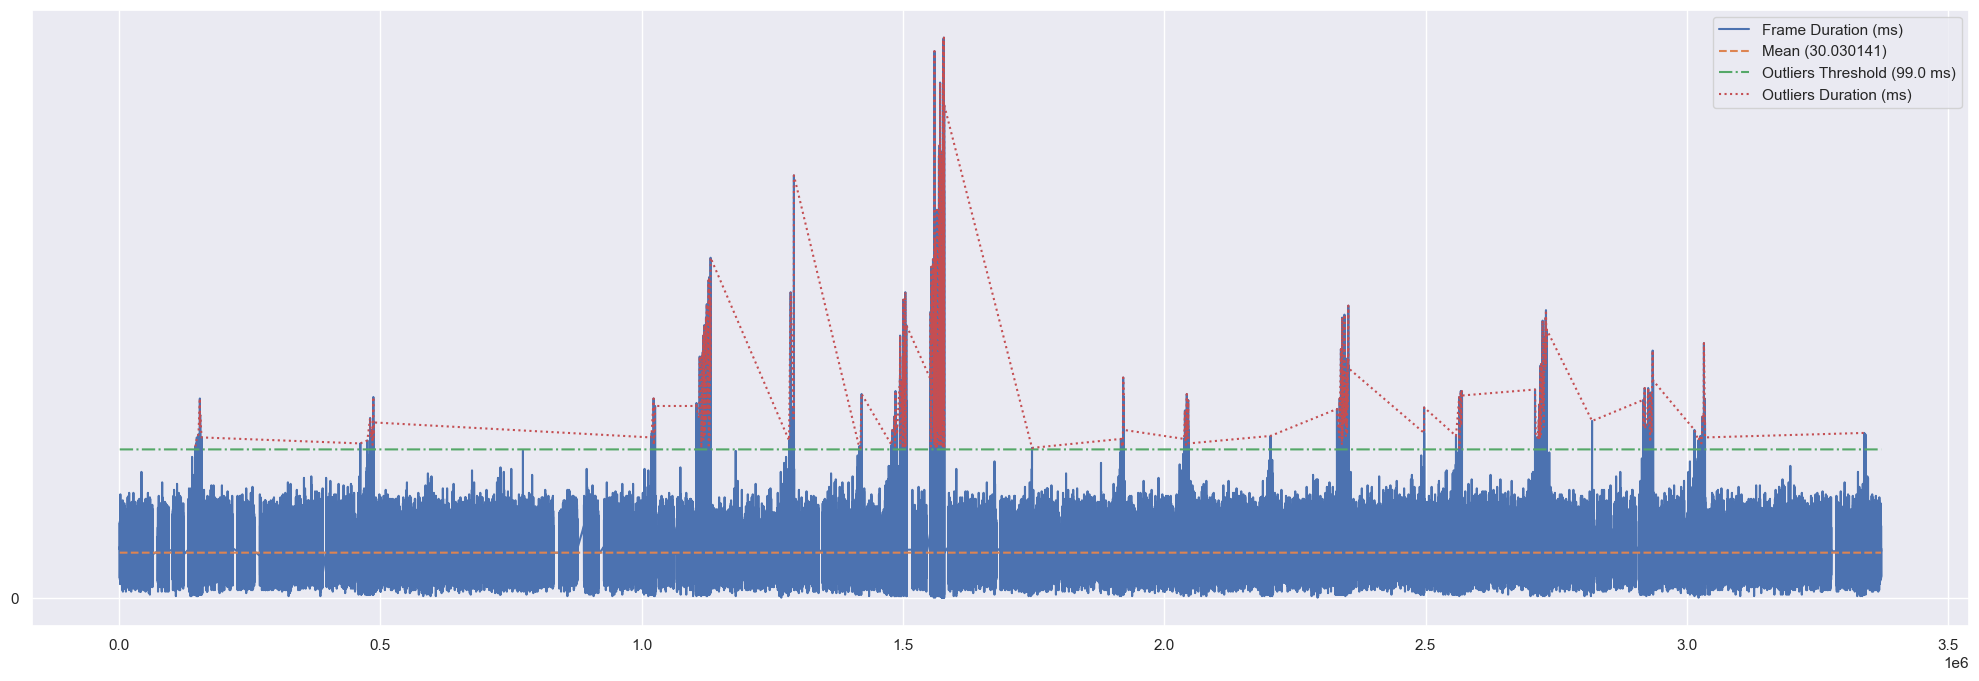

In [50]:
data_interaction = data_complete[data_complete['ProgramSubState'] == 1]

frameStats_interaction = pd.DataFrame()
frameStats_interaction['Date'] = data_interaction['FrameStats']

descStats_interaction = frameStats_interaction.describe(percentiles=percentiles)
display(descStats_interaction)

createPlot(data_interaction, frameStats_interaction, descStats_interaction, 'frametimes_interaction')

,Date
0,NaN
1,45.0
2,16.0
3,32.0
4,13.0
...,...
2890534,31.0
2890535,31.0
2890536,32.0
2890537,31.0


,Date
count,2890538.00000
mean,30.03452
std,6.73697
min,0.00000
5%,16.00000
10%,18.00000
25%,30.00000
50%,31.00000
75%,32.00000
90%,33.00000


,ProbandId,Block,Trial,TrialNumber,ProgramState,ProgramSubState,FrameStats
117618,2,3,11,74,4,1,101.0
119502,2,3,12,75,4,1,103.0
120643,2,3,13,76,4,1,107.0
123784,2,3,16,79,4,1,109.0
126453,2,3,18,81,4,1,133.0
...,...,...,...,...,...,...,...
2588670,21,1,20,41,4,1,117.0
2588748,21,1,20,41,4,1,107.0
2653647,22,0,0,0,4,0,190.0
2858195,23,2,17,59,4,1,110.0


/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_mean = [descstats["Date"][1]] * len(framestats)
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(framestats.index, y_mean, label=f'Mean ({format(descstats["Date"][1],"f")})', linestyle='--')
/var/folders/94/jmc3f73x53bbbvrrms8z445m0000gn/T/ipykernel_12267/1009134083.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated

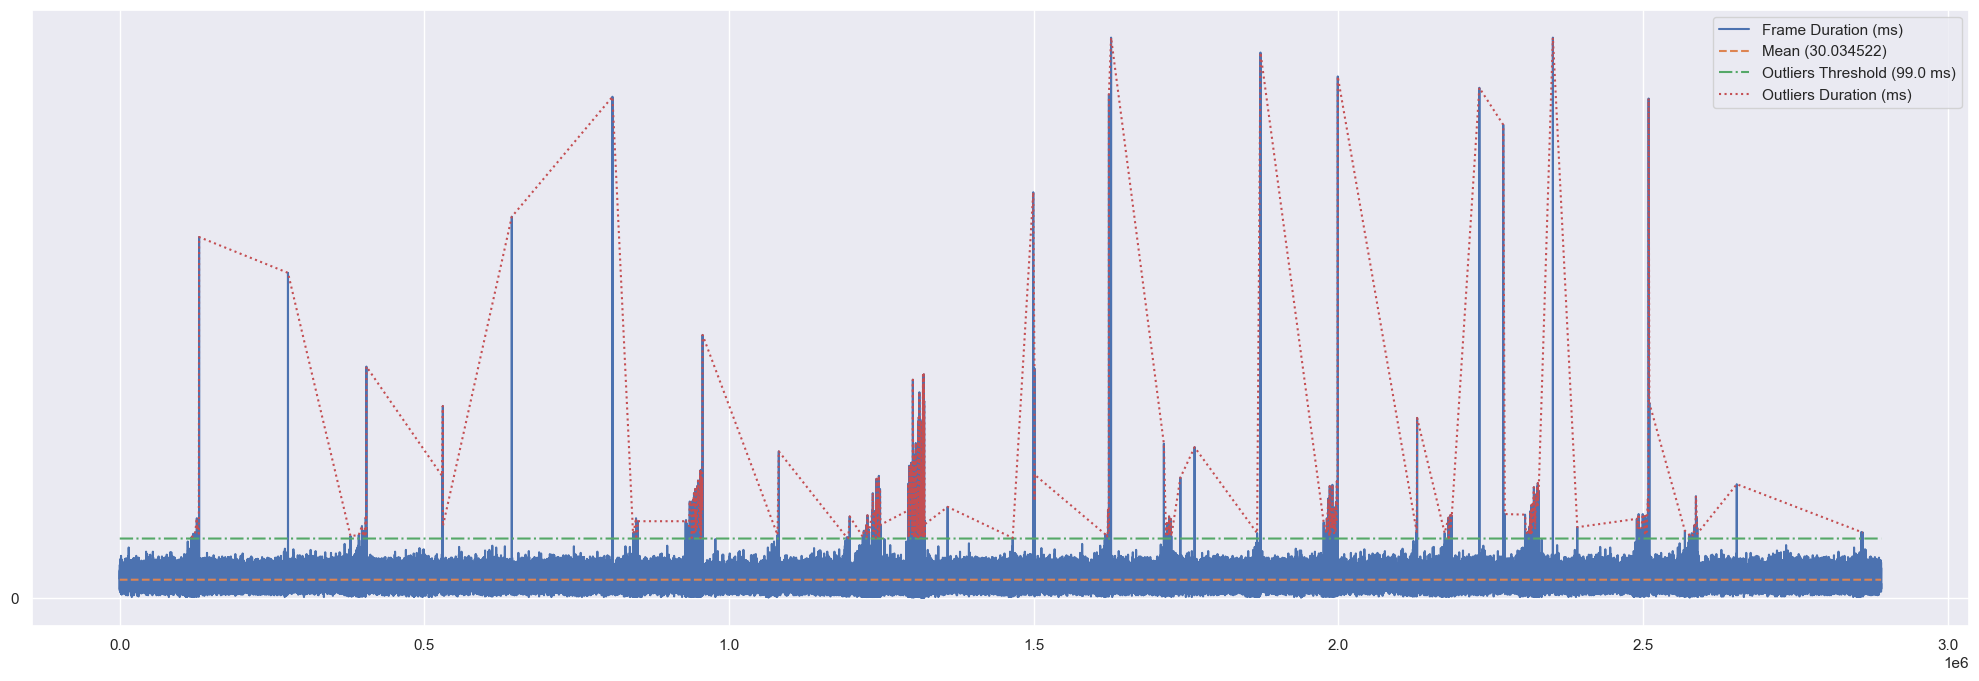

In [51]:

frameStats_experiment, descStats_experiment = computeFrameTimes(data_experiment)

createPlot(data_experiment, frameStats_experiment, descStats_experiment, 'frametimes_experiment')

In [52]:
def computeCI(df, m= 'mean', c='count', s='std'):
    df['ci95_hi'] = df[m] + 1.96*df[s]/(df[c].apply(np.sqrt))
    df['ci95_lo'] = df[m] - 1.96*df[s]/(df[c].apply(np.sqrt))

def computeWhiskers(df, desc, col_names, q1='25%', q3='75%'):

    desc['iqr'] = desc[q3] - desc[q1]

    # Whisker-Berechnung (innerhalb 1.5 * IQR)
    desc['lower_bound'] = desc[q1] - 1.5 * desc['iqr']
    desc['upper_bound'] = desc[q3] + 1.5 * desc['iqr']    

    lower_whiskers = []
    upper_whiskers = []

    for col_name in col_names:
        lower_bound = desc['lower_bound'].T[col_name]
        upper_bound = desc['upper_bound'].T[col_name]

        # Whiskers sind die letzten Punkte innerhalb dieser Grenzen
        l = df[df[col_name] >= lower_bound][col_name].min()
        u = df[df[col_name] <= upper_bound][col_name].max()

        lower_whiskers.append(l)
        upper_whiskers.append(u)

    desc['lower_whisker'] = lower_whiskers
    desc['upper_whisker'] = upper_whiskers   

    return desc

In [53]:
desc_interaction = pd.DataFrame()
desc_interaction['FrameStats'] = descStats_interaction['Date']
desc_interaction = desc_interaction.T

computeCI(desc_interaction)
computeWhiskers(data_interaction, desc_interaction, ['FrameStats'])

display(desc_interaction.T)

desc_interaction.T.to_csv(rf'{export_data}desc_stats__framestats_interaction.csv', sep=';')

,FrameStats
count,2.688171e+06
mean,3.003014e+01
std,6.502516e+00
min,0.000000e+00
5%,1.600000e+01
10%,1.800000e+01
25%,3.000000e+01
50%,3.100000e+01
75%,3.200000e+01
90%,3.300000e+01


In [54]:

desc_complete = pd.DataFrame()
desc_complete['FrameStats'] = descStats_complete['Date']
desc_complete = desc_complete.T

computeCI(desc_complete)

# desc2 = pd.DataFrame()
# desc2['FrameStats'] = desc_complete.T['Date']

computeWhiskers(data_complete, desc_complete, ['FrameStats'])

display(desc_complete.T)

desc_complete.T.to_csv(rf'{export_data}desc_stats__framestats_complete.csv', sep=';')

,FrameStats
count,3.371631e+06
mean,3.003119e+01
std,6.624187e+00
min,0.000000e+00
5%,1.600000e+01
10%,1.800000e+01
25%,3.000000e+01
50%,3.100000e+01
75%,3.200000e+01
90%,3.300000e+01


In [55]:
results_experiment = pd.read_csv(rf'{export_data}results_experiment.csv', sep=";")
display(results_experiment)

,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,TrialNumber,CleanedUpInteractionStart_DT,CleanedUpInteractionEnd_DT,ResultNumberDifference,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition
0,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,0,2022-08-01 14:14:05.504,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2
1,0,2022-08-01T14:16:08.915Z,No Feedback,2022-08-01T14:16:03.467Z,3,165,"[122, 147, 165, 150, 129, 138, 149]",2,3,165,...,1,2022-08-01 14:15:26.143,2022-08-01 14:16:00.890,0,0,True,True,40.671,34.747,3
2,0,2022-08-01T14:17:10.611Z,No Feedback,2022-08-01T14:17:06.246Z,5,154,"[148, 130, 142, 149, 154, 131, 147]",2,4,154,...,2,2022-08-01 14:16:10.883,2022-08-01 14:17:05.397,0,-1,False,True,57.331,54.514,4
3,0,2022-08-01T14:18:09.619Z,No Feedback,2022-08-01T14:18:05.670Z,3,164,"[141, 132, 164, 110, 152, 147, 154]",2,3,164,...,3,2022-08-01 14:17:11.970,2022-08-01 14:18:04.603,0,0,True,True,55.058,52.633,5
4,0,2022-08-01T14:19:06.811Z,No Feedback,2022-08-01T14:19:02.997Z,7,154,"[142, 148, 140, 143, 144, 132, 154]",2,7,154,...,4,2022-08-01 14:18:11.962,2022-08-01 14:19:02.010,0,0,True,True,53.376,50.048,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,3,2022-08-23T11:27:13.692Z,No Feedback,2022-08-23T11:27:09.628Z,7,159,"[153, 122, 128, 144, 140, 154, 159]",23,7,159,...,79,2022-08-23 11:26:33.878,2022-08-23 11:27:08.564,0,0,True,True,37.272,34.686,501
1844,3,2022-08-23T11:27:49.516Z,No Feedback,2022-08-23T11:27:45.172Z,5,157,"[146, 142, 133, 156, 157, 128, 138]",23,5,157,...,80,2022-08-23 11:27:15.467,2022-08-23 11:27:44.655,0,0,True,True,31.479,29.188,502
1845,3,2022-08-23T11:28:51.795Z,No Feedback,2022-08-23T11:28:46.148Z,6,148,"[139, 140, 143, 147, 142, 148, 141]",23,6,148,...,81,2022-08-23 11:27:50.891,2022-08-23 11:28:45.618,0,0,True,True,56.632,54.727,503
1846,3,2022-08-23T11:29:32.908Z,No Feedback,2022-08-23T11:29:29.764Z,1,152,"[152, 139, 138, 134, 145, 144, 148]",23,1,152,...,82,2022-08-23 11:28:54.105,2022-08-23 11:29:28.940,0,0,True,True,37.968,34.835,504


In [56]:
date_array = data_complete['Date'].values

results_experiment['StartIdx'] = np.searchsorted(date_array, results_experiment['CleanedUpInteractionStart_DT'].values)
results_experiment['EndIdx'] = np.searchsorted(date_array, results_experiment['CleanedUpInteractionEnd_DT'].values)
results_experiment['NumFrames'] = results_experiment['EndIdx'] - results_experiment['StartIdx']
results_experiment['FrameRate'] = results_experiment['NumFrames'] / (results_experiment['DurationMS_Cleaned'])  

display(results_experiment)

,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition,StartIdx,EndIdx,NumFrames,FrameRate
0,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,0,True,True,78.538,73.023,2,30892,33325,2433,33.318270
1,0,2022-08-01T14:16:08.915Z,No Feedback,2022-08-01T14:16:03.467Z,3,165,"[122, 147, 165, 150, 129, 138, 149]",2,3,165,...,0,True,True,40.671,34.747,3,33579,34737,1158,33.326618
2,0,2022-08-01T14:17:10.611Z,No Feedback,2022-08-01T14:17:06.246Z,5,154,"[148, 130, 142, 149, 154, 131, 147]",2,4,154,...,-1,False,True,57.331,54.514,4,35070,36886,1816,33.312544
3,0,2022-08-01T14:18:09.619Z,No Feedback,2022-08-01T14:18:05.670Z,3,164,"[141, 132, 164, 110, 152, 147, 154]",2,3,164,...,0,True,True,55.058,52.633,5,37105,38859,1754,33.325100
4,0,2022-08-01T14:19:06.811Z,No Feedback,2022-08-01T14:19:02.997Z,7,154,"[142, 148, 140, 143, 144, 132, 154]",2,7,154,...,0,True,True,53.376,50.048,6,39104,40772,1668,33.328005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,3,2022-08-23T11:27:13.692Z,No Feedback,2022-08-23T11:27:09.628Z,7,159,"[153, 122, 128, 144, 140, 154, 159]",23,7,159,...,0,True,True,37.272,34.686,501,3364579,3365735,1156,33.327567
1844,3,2022-08-23T11:27:49.516Z,No Feedback,2022-08-23T11:27:45.172Z,5,157,"[146, 142, 133, 156, 157, 128, 138]",23,5,157,...,0,True,True,31.479,29.188,502,3365965,3366937,972,33.301357
1845,3,2022-08-23T11:28:51.795Z,No Feedback,2022-08-23T11:28:46.148Z,6,148,"[139, 140, 143, 147, 142, 148, 141]",23,6,148,...,0,True,True,56.632,54.727,503,3367145,3368968,1823,33.310797
1846,3,2022-08-23T11:29:32.908Z,No Feedback,2022-08-23T11:29:29.764Z,1,152,"[152, 139, 138, 134, 145, 144, 148]",23,1,152,...,0,True,True,37.968,34.835,504,3369251,3370412,1161,33.328549


In [59]:
desc_fps = pd.DataFrame(results_experiment['FrameRate'].describe(percentiles=percentiles)).T

computeCI(desc_fps)

# desc2 = pd.DataFrame()
# desc2['FrameStats'] = desc_complete.T['Date']

computeWhiskers(results_experiment, desc_fps, ['FrameRate'])

display(desc_fps.T)

desc_fps.T.to_csv(rf'{export_data}desc_stats__framerate.csv', sep=';')

,FrameRate
count,1848.000000
mean,33.296804
std,0.100015
min,31.661353
5%,33.183026
10%,33.272389
25%,33.303568
50%,33.318507
75%,33.328039
90%,33.336177


In [62]:
results_experiment['FrameTime'] = 1.0 / results_experiment['FrameRate'] * 1000

desc_frametime = pd.DataFrame(results_experiment['FrameTime'].describe(percentiles=percentiles)).T

computeCI(desc_frametime)

# desc2 = pd.DataFrame()
# desc2['FrameStats'] = desc_complete.T['Date']

computeWhiskers(results_experiment, desc_frametime, ['FrameTime'])

display(desc_frametime.T)

desc_frametime.T.to_csv(rf'{export_data}desc_stats__frametime.csv', sep=';')

,FrameTime
count,1848.000000
mean,30.033190
std,0.092357
min,29.967742
5%,29.993688
10%,29.997441
25%,30.004766
50%,30.013350
75%,30.026813
90%,30.054950


In [81]:
proband_times = pd.DataFrame()

proband_times['Start'] = pd.to_datetime(results_experiment[results_experiment['TrialNumber'] == 0].reset_index()['StartDate_DT'])
proband_times['End'] = pd.to_datetime(results_experiment[results_experiment['TrialNumber'] == 83].reset_index()['CommitResultDate_DT'])
proband_times['Duration'] = proband_times['End'] - proband_times['Start']
proband_times['Duration_Seconds'] = proband_times['Duration'].apply(lambda delta: delta.seconds)
proband_times['Duration_Minutes'] = proband_times['Duration_Seconds'] / 60.0

display(proband_times)

proband_times.to_csv(rf'{export_data}duration_experiment.csv', sep=';')

,Start,End,Duration,Duration_Seconds,Duration_Minutes
0,2022-08-01 14:14:00.581,2022-08-01 15:17:48.510,0 days 01:03:47.929000,3827,63.783333
1,2022-08-02 07:13:19.816,2022-08-02 08:25:18.274,0 days 01:11:58.458000,4318,71.966667
2,2022-08-04 13:56:09.719,2022-08-04 14:59:28.918,0 days 01:03:19.199000,3799,63.316667
3,2022-08-05 09:13:16.709,2022-08-05 10:14:15.149,0 days 01:00:58.440000,3658,60.966667
4,2022-08-05 11:55:33.495,2022-08-05 12:51:51.238,0 days 00:56:17.743000,3377,56.283333
5,2022-08-06 10:28:55.754,2022-08-06 11:50:24.826,0 days 01:21:29.072000,4889,81.483333
6,2022-08-08 07:23:19.132,2022-08-08 08:36:55.044,0 days 01:13:35.912000,4415,73.583333
7,2022-08-08 11:56:42.017,2022-08-08 12:58:18.792,0 days 01:01:36.775000,3696,61.600000
8,2022-08-09 11:08:09.794,2022-08-09 12:05:48.259,0 days 00:57:38.465000,3458,57.633333
9,2022-08-09 14:26:03.719,2022-08-09 15:44:55.272,0 days 01:18:51.553000,4731,78.850000


In [82]:
desc_experiment_duration = pd.DataFrame(proband_times['Duration_Minutes'].describe(percentiles=percentiles)).T

computeCI(desc_experiment_duration)

# desc2 = pd.DataFrame()
# desc2['FrameStats'] = desc_complete.T['Date']

computeWhiskers(proband_times, desc_experiment_duration, ['Duration_Minutes'])

display(desc_experiment_duration.T)

desc_experiment_duration.T.to_csv(rf'{export_data}desc_stats__duration_experiment.csv', sep=';')

,Duration_Minutes
count,22.000000
mean,65.103788
std,8.476148
min,50.583333
5%,52.640833
10%,53.703333
25%,60.229167
50%,63.550000
75%,71.012500
90%,76.643333


# deprecated

In [ ]:
frameStats = pd.DataFrame(pd.to_datetime(data_complete["Date"]).diff().dt.microseconds / 1000.0)

display(frameStats)

desc_stats = frameStats.describe()

display(desc_stats.apply(lambda s: s.apply('{0:.5f}'.format)))

data_complete["FrameStats"] = frameStats

outliers_threshold = 99.0

outliers = data_complete[data_complete["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

display(outliers)
print(len(outliers))

y_mean = [desc_stats["Date"][1]] * len(frameStats)
outliers_threshold_line = [outliers_threshold] * len(frameStats)

fig,ax = plt.subplots(figsize=(25,8))

ax.plot(frameStats.index, frameStats["Date"], label='Frame Duration (ms)')
ax.plot(frameStats.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
ax.plot(frameStats.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

legend = ax.legend(loc='upper right')

plt.yticks(np.arange(0, desc_stats["Date"][7], 100))


fig.savefig(rf'{export_img}frameTimes.png')
fig.savefig(rf'{export_img}frameTimes.svg')

plt.show()

In [ ]:
# data_complete['Date'] = pd.to_datetime(data_complete['Date'])

frameStats2 = data_complete[data_complete['ProgramSubState'] == 1]

desc_stats2 = pd.DataFrame(frameStats2['FrameStats'].describe())

display(desc_stats2.apply(lambda s: s.apply('{0:.5f}'.format)))

outliers_threshold = 99.0

outliers = frameStats2[frameStats2["FrameStats"] > outliers_threshold][["ProbandId", "Block", "Trial", "TrialNumber", "ProgramState", "ProgramSubState", "FrameStats"]]

display(outliers)
print(len(outliers))

y_mean = [desc_stats2["FrameStats"][1]] * len(frameStats2)
outliers_threshold_line = [outliers_threshold] * len(frameStats2)

fig,ax = plt.subplots(figsize=(25,8))

ax.plot(frameStats2.index, frameStats2["FrameStats"], label='Frame Duration (ms)')
ax.plot(frameStats2.index, y_mean, label=f'Mean ({format(desc_stats["Date"][1],"f")})', linestyle='--')
ax.plot(frameStats2.index, outliers_threshold_line, label=f'Outliers Threshold ({outliers_threshold} ms)', linestyle='-.')

ax.plot(outliers.index, outliers["FrameStats"], label='Outliers Duration (ms)', linestyle=':')

legend = ax.legend(loc='upper right')

plt.yticks(np.arange(0, desc_stats["Date"][7], 100))


fig.savefig(rf'{export_img}frameTimes_interactionOnly.png')
fig.savefig(rf'{export_img}frameTimes_interactionOnly.svg')

plt.show()

